In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt

#--------------------Setup the main directories------------------#
#Define the various directories
script_dir = os.getcwd()                         #define current dir
main_dir = os.path.dirname(script_dir)           #go up of one directory
results_dir = os.path.join(main_dir, "figure")   #define results dir

if not os.path.exists(results_dir):              #if the directory does not exist create it
    os.mkdir(results_dir)


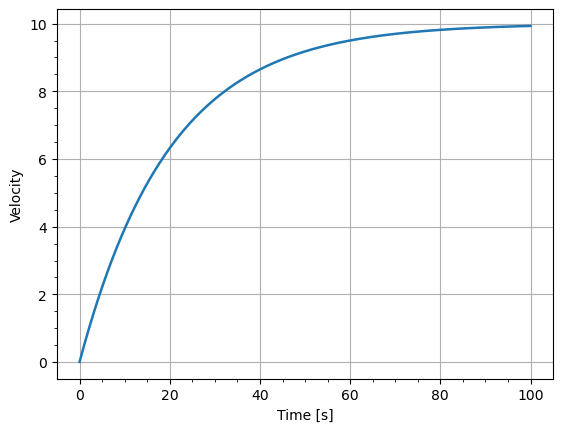

In [72]:
#NUMERICAL SIMULATION (OLD)

#-----------------Integrator: Euler method------------------------#
def euler_step(u, F, dt, *params):
    return u + dt * F(u, *params)  #nd array of u at instant n+1

#--------------------------Right Hand Side------------------------#
def F(u, b, m, V):
    #define A and B
    A = np.array([[0, 1], [0, -b/m]])     #matrix A of the system
    B = np.array((0, V/m))
    return A @ u + B

#----------------------------Step function------------------------#
def step_function(t, t0=0):
    return 500 * np.heaviside(t-t0, 1)    # 0 if t < t0
                                    # 1 if  >= t0

#--------------------------Temporal evolution----------------------#
def evolution(int_method, Nt_step, dt, physics_params, V, t0):
    #-----------------Initialize the problem-------------------#
    tmax = dt * Nt_step             #total time of simulation
    tt = np.arange(0, tmax, dt)     #temporal grid
    u0 = np.array((0, 0))           #initial condition
    u_t = np.copy(u0)               #create a copy to evolve it in time
    V_signal = V(tt, t0)            #signal applied to the system in time
    #----------------------------------------------------------#

    #----------------------Time evolution----------------------#
    x = []      #initialize list of w value
    v = []      #initialize list of i value
    for Vi in V_signal:
        u_t = int_method(u_t, F, dt, *physics_params, Vi) #step n+1
        x.append(u_t[0])
        v.append(u_t[1])
    return tt, np.array(x), np.array(v)


if __name__ == '__main__':
    #Parameters of the simulation
    Nt_step = 1e4     #temporal steps
    dt = 1e-2         #temporal step size
    #Parameters of the system
    b = 50
    m = 1000
    t0 = 0      #parameter of the step function [s]

    #Signal applied to the system
    V = step_function

    #Simulation
    physical_params = [b, m]
    simulation_params = [euler_step, Nt_step, dt]
    tt, x, v = evolution(*simulation_params, physical_params, V, t0)

    #--------------------------Plot results----------------------#
    #plt.title('Step response for DC motor (open loop)')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity')
    plt.grid(True)
    plt.minorticks_on()
    plt.plot(tt, v, linestyle='-', linewidth=1.8, marker='')

    # save the plot in the results dir
    #out_name = os.path.join(results_dir, "StepResp_theta_numSim1.png")
    #plt.savefig(out_name)
    plt.show()

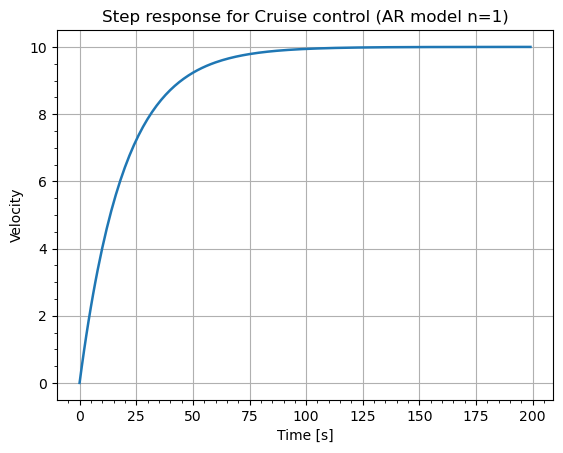

In [76]:
#AR model n = 1

#AR parameter
alpha1 = b/m - 1
beta = 1/m

#define initial array
time = 200
v = np.zeros(time)
u = np.ones(time)*500

for i in range(0, time-1):
    v[i+1] = beta * u[i] - alpha1 *v[i]

#--------------------------Plot results----------------------#
plt.title('Step response for Cruise control (AR model n=1)')
plt.xlabel('Time [s]')
plt.ylabel('Velocity')
plt.grid(True)
plt.minorticks_on()
plt.plot(v, linestyle='-', linewidth=1.8, marker='')

# save the plot in the results dir
out_name = os.path.join(results_dir, "StepResp_v_cruisC.png")
plt.savefig(out_name)
plt.show()

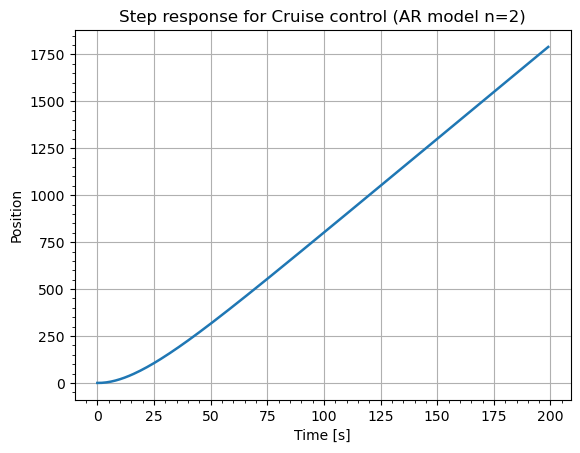

In [78]:
#AR model n = 2

#AR parameter
alpha2 = b/m - 2
alpha1 = 1 - b/m
beta = 1/m

#define initial array
time = 200
x = np.zeros(time)
u = np.ones(time)*500

for i in range(0, 200-2):
    x[i+2] = beta * u[i] - alpha2 * x[i+1] - alpha1 * x[i]

#--------------------------Plot results----------------------#
plt.title('Step response for Cruise control (AR model n=2)')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.grid(True)
plt.minorticks_on()
plt.plot(x, linestyle='-', linewidth=1.8, marker='')

# save the plot in the results dir
out_name = os.path.join(results_dir, "StepResp_x_cruisC.png")
plt.savefig(out_name)
plt.show()
